Device: cpu
a)
Dataset size: 705
label
0    583
1    122
Name: count, dtype: int64


Device set to use cpu
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:00<00:00, 706567.34it/s]
Device set to use cpu
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:00<00:00, 705219.25it/s]

clf1 accuracy: 0.826950354609929
              precision    recall  f1-score   support

           0     0.8270    1.0000    0.9053       583
           1     0.0000    0.0000    0.0000       122

    accuracy                         0.8270       705
   macro avg     0.4135    0.5000    0.4526       705
weighted avg     0.6838    0.8270    0.7486       705

clf2 accuracy: 0.826950354609929
              precision    recall  f1-score   support

           0     0.8270    1.0000    0.9053       583
           1     0.0000    0.0000    0.0000       122

    accuracy                         0.8270       705
   macro avg     0.4135    0.5000    0.4526       705
weighted avg     0.6838    0.8270    0.7486       705

In Lab 2:
Accuracy: 0.8369
Classification report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       117
           1       1.00      0.04      0.08        24

    accuracy                           0.84       141
   macro avg


D:\Магістрат\ІAД\lab43\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Магістрат\ІAД\lab43\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Магістрат\ІAД\lab43\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Магістрат\ІAД\lab43\venv\li

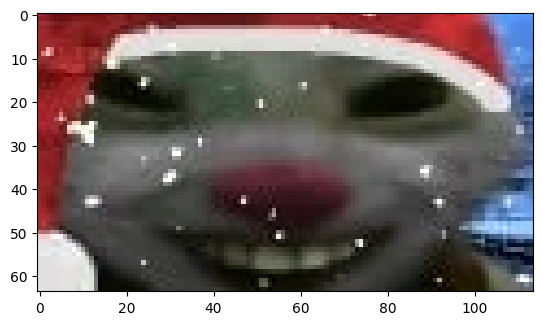

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 16.26it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that in

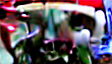

In [18]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionImg2ImgPipeline
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

#a)
print("a)")
df = pd.read_csv("reviews_data.csv")

TEXT_COL = "Review"
RATING_COL = "Rating"

df = df.dropna(subset=[TEXT_COL, RATING_COL])

df["label"] = (df[RATING_COL] >= 4).astype(int)

texts = df[TEXT_COL].tolist()
true_labels = df["label"].tolist()

print("Dataset size:", len(df))
print(df["label"].value_counts())


clf1 = pipeline("sentiment-analysis",model="tabularisai/multilingual-sentiment-analysis")

clf1_preds = []

for out in tqdm(clf1(texts, batch_size=16)):
    clf1_preds.append(1 if out["label"] == "POSITIVE" else 0)

clf2 = pipeline("sentiment-analysis", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

clf2_preds = []

for out in tqdm(clf2(texts, batch_size=16)):
    clf2_preds.append(1 if out["label"] == "LABEL_2" else 0)

print("clf1 accuracy:", accuracy_score(true_labels, clf1_preds))
print(classification_report(true_labels, clf1_preds, digits=4))

print("clf2 accuracy:", accuracy_score(true_labels, clf2_preds))
print(classification_report(true_labels, clf2_preds, digits=4))

print("""In Lab 2:
Accuracy: 0.8369
Classification report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       117
           1       1.00      0.04      0.08        24

    accuracy                           0.84       141
   macro avg       0.92      0.52      0.50       141
weighted avg       0.86      0.84      0.77       141"""
)
print("The best model: In Lab 2 ")

#c) Image-to-Image
print("c)")

img = Image.open("XDDD.jpg").convert("RGB")
img = np.array(img)

H, W, C = img.shape
print("Image shape:", img.shape)
print("dtype:", img.dtype)

plt.imshow(img)
plt.show()

cat = Image.fromarray(img)

pipe = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", safety_checker=None).to("cpu")


prompt = "make an abstract styl"

result = pipe(
    prompt=prompt,
    image=cat,
    strength=0.2,
    guidance_scale=5
).images[0]

result